In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Read the data
cmdf = pd.read_csv('company.csv')

In [28]:
cmdf.shape

(148, 6)

In [32]:
cmdf.isna().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [118]:
cmdf.dropna(subset=['Company'])

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [60]:
#List of companies
list(cmdf['Company'].dropna().unique())

['TCS',
 'Infosys',
 'CTS',
 'Tata Consultancy Services',
 'Congnizant',
 'Infosys Pvt Lmt']

In [100]:
# Number of employees per company
emp_dist = cmdf['Company'].value_counts()

In [101]:
cmdf['Company'].value_counts().index

Index(['TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Congnizant',
       'Infosys Pvt Lmt'],
      dtype='object')

In [198]:
cmdf['Company'] = np.where(cmdf['Company']=='Tata Consultancy Services','TCS',cmdf['Company'])
cmdf['Company'] = np.where(cmdf['Company']=='Infosys Pvt Lmt','Infosys',cmdf['Company'])
cmdf['Company'] = np.where(cmdf['Company']=='Congnizant','CTS',cmdf['Company'])
cmdf['Company'] = cmdf['Company'].fillna('Anonymous')
cmdf['Place'] = cmdf['Place'].fillna('Anonymous')

Text(0,0.5,'No of employees')

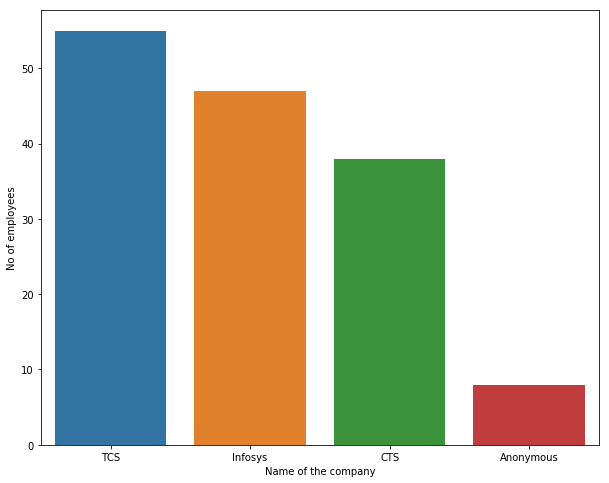

In [199]:
plt.figure(figsize = (10,8))
sns.barplot(x=cmdf['Company'].value_counts().index, y=cmdf['Company'].value_counts())
plt.xlabel('Name of the company')
plt.ylabel('No of employees')

In [200]:
#Max & Min employer
maxe = cmdf['Company'].value_counts().index[0]
mine = cmdf['Company'].value_counts().index[-1]
print('Maximum employed com :', maxe)
print('Minimum employed com :', mine)

Maximum employed com : TCS
Minimum employed com : Anonymous


In [201]:
cmdf['Place'].value_counts()

Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Anonymous     14
Cochin        13
Hyderabad      8
Noida          8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: Place, dtype: int64

Text(0,0.5,'No of employees')

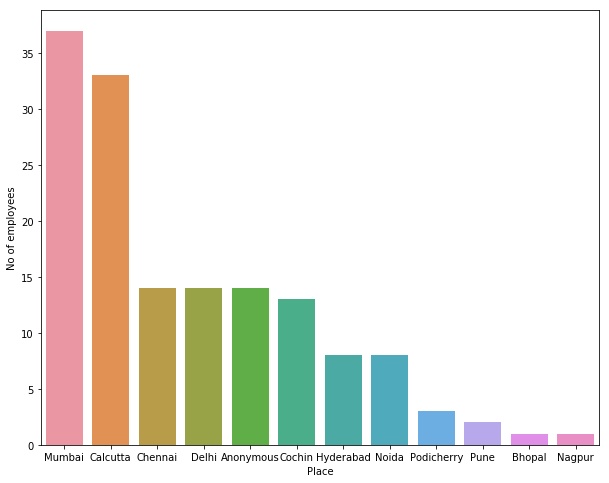

In [202]:
plt.figure(figsize = (10,8))
sns.barplot(x=cmdf['Place'].value_counts().index, y=cmdf['Place'].value_counts())
plt.xlabel('Place')
plt.ylabel('No of employees')

In [216]:
cmdf_place = pd.get_dummies(data = cmdf[['Company','Place']],columns = ['Place']).groupby(by='Company').sum()

In [209]:
cmdf_place

,Place_Anonymous,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
Company,,,,,,,,,,,,
Anonymous,1,0,2,1,0,1,1,1,0,1,0,0
CTS,3,0,7,3,4,2,3,10,0,2,2,2
Infosys,3,1,11,4,5,6,3,12,0,1,1,0
TCS,7,0,13,6,4,5,1,14,1,4,0,0


In [210]:
cmdf['Place'].dropna().unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Anonymous', 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

Text(0,0.5,'No of employees')

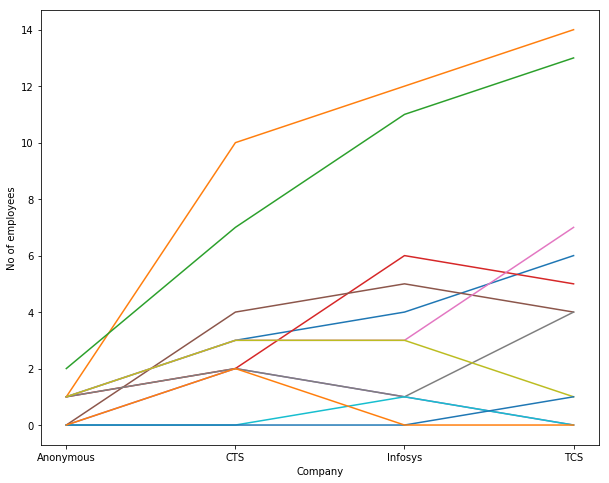

In [211]:
plt.figure(figsize = (10,8))
for p in cmdf['Place'].unique():
    sns.lineplot(data = cmdf_place['Place_'+ str(p)])
plt.xlabel('Company')
plt.ylabel('No of employees')

In [220]:
#Mean salary of each company

cmdf_copy = cmdf.set_index('Company')

In [224]:
cmdf_copy.groupby(level=0).mean()

,Age,Salary,Gender
Company,,,
Anonymous,27.333333,6176.600000,0.125000
CTS,31.631579,4582.925926,0.210526
Infosys,32.051282,5331.348837,0.148936
TCS,28.659574,5609.714286,0.309091


In [225]:
cmdf_copy.groupby(level=0).describe()

Age                                                       Salary  \
          count       mean        std   min    25%   50%    75%   max  count   
Company                                                                        
Anonymous   6.0  27.333333   5.316641  22.0  24.25  25.0  31.00  35.0    5.0   
CTS        38.0  31.631579  12.572860   0.0  22.00  33.0  43.75  46.0   27.0   
Infosys    39.0  32.051282  12.818467   0.0  22.00  32.0  43.50  54.0   43.0   
TCS        47.0  28.659574   8.455193   0.0  22.50  33.0  34.00  38.0   49.0   

                       ...                  Gender                           \
                  mean ...      75%     max  count      mean       std  min   
Company                ...                                                    
Anonymous  6176.600000 ...   8943.0  8943.0    8.0  0.125000  0.353553  0.0   
CTS        4582.925926 ...   9000.0  9876.0   38.0  0.210526  0.413155  0.0   
Infosys    5331.348837 ...   7327.0  8943.0   47.0  0.148936  0.359875  0.0   
TCS        5609.714286 ...   7084.0  9024.0   55.0  0.309091  0.466378  0.0   

                               
           25%  50%  75%  max  
Company                        
Anonymous  0.0  0.0  0.0  1.0  
CTS        0.0  0.0  0.0  1.0  
Infosys    0.0  0.0  0.0  1.0  
TCS        0.0  0.0  1.0  1.0  

[4 rows x 24 columns]